# 广义线性模型
-   广义线性模型的一大特征就是它可以使用非正态分布
-   正态分布之外的概率分布属于指数分布族

## 组成
-   总体服从的概率分布
-   线性预测算子
-   联系函数

### 概率分布
广义线性模型可用于正态分布、二项分布和泊松分布等多种概率分布。

### 线性预测算子
线性关系式表示的解释变量
比如: β0 + β1 X 气温(℃)

β0 + β1 X 学习时间(minute)

### 联系函数
将响应变量和线性预测算子关联在一起。
月份记录 = β0 + β1 X 学习时间(minute)
概率分布与联系函数的常用的组合如下：
eg:

    `概率分布` `联系函数`  `模型名称`

    `正态分布` `恒等函数`  `正态线性模型`

    `二项分布` `logit函数` `logistic回归模型`

    `泊松分布` `对数函数`  `泊松回归模型`

| 概率分布    | 联系函数   | 模型名称    |
|    ------  |------     | ------      |
|   正态分布  | 恒等函数  | 正态线性模型 |
|   二项分布  | logit函数 | logistic回归模型 |
|   泊松分布  | 对数函数   | 泊松回归模型 |


In [ ]:
# 广义线性模型

## logistic回归

In [19]:
import pandas as pd
import seaborn as sns
# 用于估计统计模型的库(部分版本会报出警告信息)
import statsmodels.formula.api as smf
import statsmodels.api as sm

<AxesSubplot:xlabel='hours', ylabel='result'>

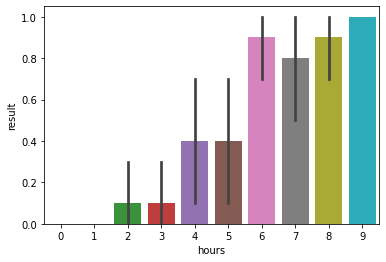

In [20]:
# 读取数据并可视化
test_result = pd.read_csv("./data/6-3-1-logistic-regression.csv")
test_result.head(3)

# 绘图
sns.barplot(x = "hours", y = "result",
                data = test_result)

In [21]:
test_result.groupby("hours").mean()

,result
hours,
0,0.0
1,0.0
2,0.1
3,0.1
4,0.4
5,0.4
6,0.9
7,0.8
8,0.9


### logistic 回归

In [26]:
from cgi import test
from tkinter.font import families


mod_glm = smf.glm(formula = "result ~ hours",
                  data = test_result,
                  family = sm.families.Binomial()).fit()
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Thu, 22 Sep 2022   Deviance:                       68.028
Time:                        19:31:37   Pearson chi2:                     84.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""